In [1]:
import pandas as pd
import seaborn as sns

sns.set_theme(palette='colorblind')
sns.set_style("whitegrid")
sns.set_context("talk")

In [2]:
import matplotlib.pyplot as plt
data = pd.read_csv("all_adult_recon.csv")
data.drop('Unnamed: 0', axis = 1, inplace = True)


In [3]:
data.head()

,data,features_cat,features_num,protected_attributes,p_att_description,target,etas,feat_dictionary,technique,model,dir_name,model_type,disparate_impact,statistical_parity_difference,equal_opportunity_difference,accuracy,eta,fs
0,<__main__.NamedDataset object at 0x7f5ed09e7970>,"['workclass', 'relationship', 'occupation', 'e...","['hours-per-week', 'capital-gain', 'capital-lo...","['gender', 'race', 'age_bins', 'marital-status']","('age_bins', ['(38.9, 46.2]', '(46.2, 53.5]', ...",>=10000,"[1, 10, 20]","{'hours-per-week': 5, 'capital-gain': 5, 'capi...",<function maximally_predictive_minimally_demog...,<function base_classifier at 0x7f5ed0a1a440>,adult_maximally_predictive_minimally_demograph...,base_model,0.909166,-0.086889,-0.026209,0.833148,NaN,MPMD
1,<__main__.NamedDataset object at 0x7f5ed09e7970>,"['workclass', 'relationship', 'occupation', 'e...","['hours-per-week', 'capital-gain', 'capital-lo...","['gender', 'race', 'age_bins', 'marital-status']","('age_bins', ['(38.9, 46.2]', '(46.2, 53.5]', ...",>=20000,"[1, 10, 20]","{'hours-per-week': 5, 'capital-gain': 5, 'capi...",<function maximally_predictive_minimally_demog...,<function base_classifier at 0x7f5ed0a1a440>,adult_maximally_predictive_minimally_demograph...,base_model,0.850762,-0.133587,-0.016804,0.713839,NaN,MPMD
2,<__main__.NamedDataset object at 0x7f5ed09e7970>,"['workclass', 'relationship', 'occupation', 'e...","['hours-per-week', 'capital-gain', 'capital-lo...","['gender', 'race', 'age_bins', 'marital-status']","('age_bins', ['(38.9, 46.2]', '(46.2, 53.5]', ...",>=30000,"[1, 10, 20]","{'hours-per-week': 5, 'capital-gain': 5, 'capi...",<function maximally_predictive_minimally_demog...,<function base_classifier at 0x7f5ed0a1a440>,adult_maximally_predictive_minimally_demograph...,base_model,0.739793,-0.104813,-0.014659,0.686787,NaN,MPMD
3,<__main__.NamedDataset object at 0x7f5ed09e7970>,"['workclass', 'relationship', 'occupation', 'e...","['hours-per-week', 'capital-gain', 'capital-lo...","['gender', 'race', 'age_bins', 'marital-status']","('age_bins', ['(38.9, 46.2]', '(46.2, 53.5]', ...",>=40000,"[1, 10, 20]","{'hours-per-week': 5, 'capital-gain': 5, 'capi...",<function maximally_predictive_minimally_demog...,<function base_classifier at 0x7f5ed0a1a440>,adult_maximally_predictive_minimally_demograph...,base_model,0.534071,-0.100318,-0.056427,0.745634,NaN,MPMD
4,<__main__.NamedDataset object at 0x7f5ed09e7970>,"['workclass', 'relationship', 'occupation', 'e...","['hours-per-week', 'capital-gain', 'capital-lo...","['gender', 'race', 'age_bins', 'marital-status']","('age_bins', ['(38.9, 46.2]', '(46.2, 53.5]', ...",>=50000,"[1, 10, 20]","{'hours-per-week': 5, 'capital-gain': 5, 'capi...",<function maximally_predictive_minimally_demog...,<function base_classifier at 0x7f5ed0a1a440>,adult_maximally_predictive_minimally_demograph...,base_model,0.516590,-0.062731,-0.025722,0.805390,NaN,MPMD


In [4]:
data['p_att_description'].replace(to_replace={"('age_bins', ['(38.9, 46.2]', '(46.2, 53.5]', '(53.5, 60.8]'])":'age_bins', 
                                                        "('gender', ['Male'])":'gender',"('marital-status', ['Married-civ-spouse'])":'ms', 
                                                         "('race', ['White'])": 'race'}, inplace= True)

In [5]:
data['p_att_description'].unique()

array(['age_bins', 'gender', 'ms', 'race'], dtype=object)

In [6]:
data['p_att'] = data['p_att_description']

In [7]:
data['p_att'].unique()

array(['age_bins', 'gender', 'ms', 'race'], dtype=object)

# for adult reconstruction, try making separate figures for each protected attribute and then use symbol for fair vs base model and color for threshold on y

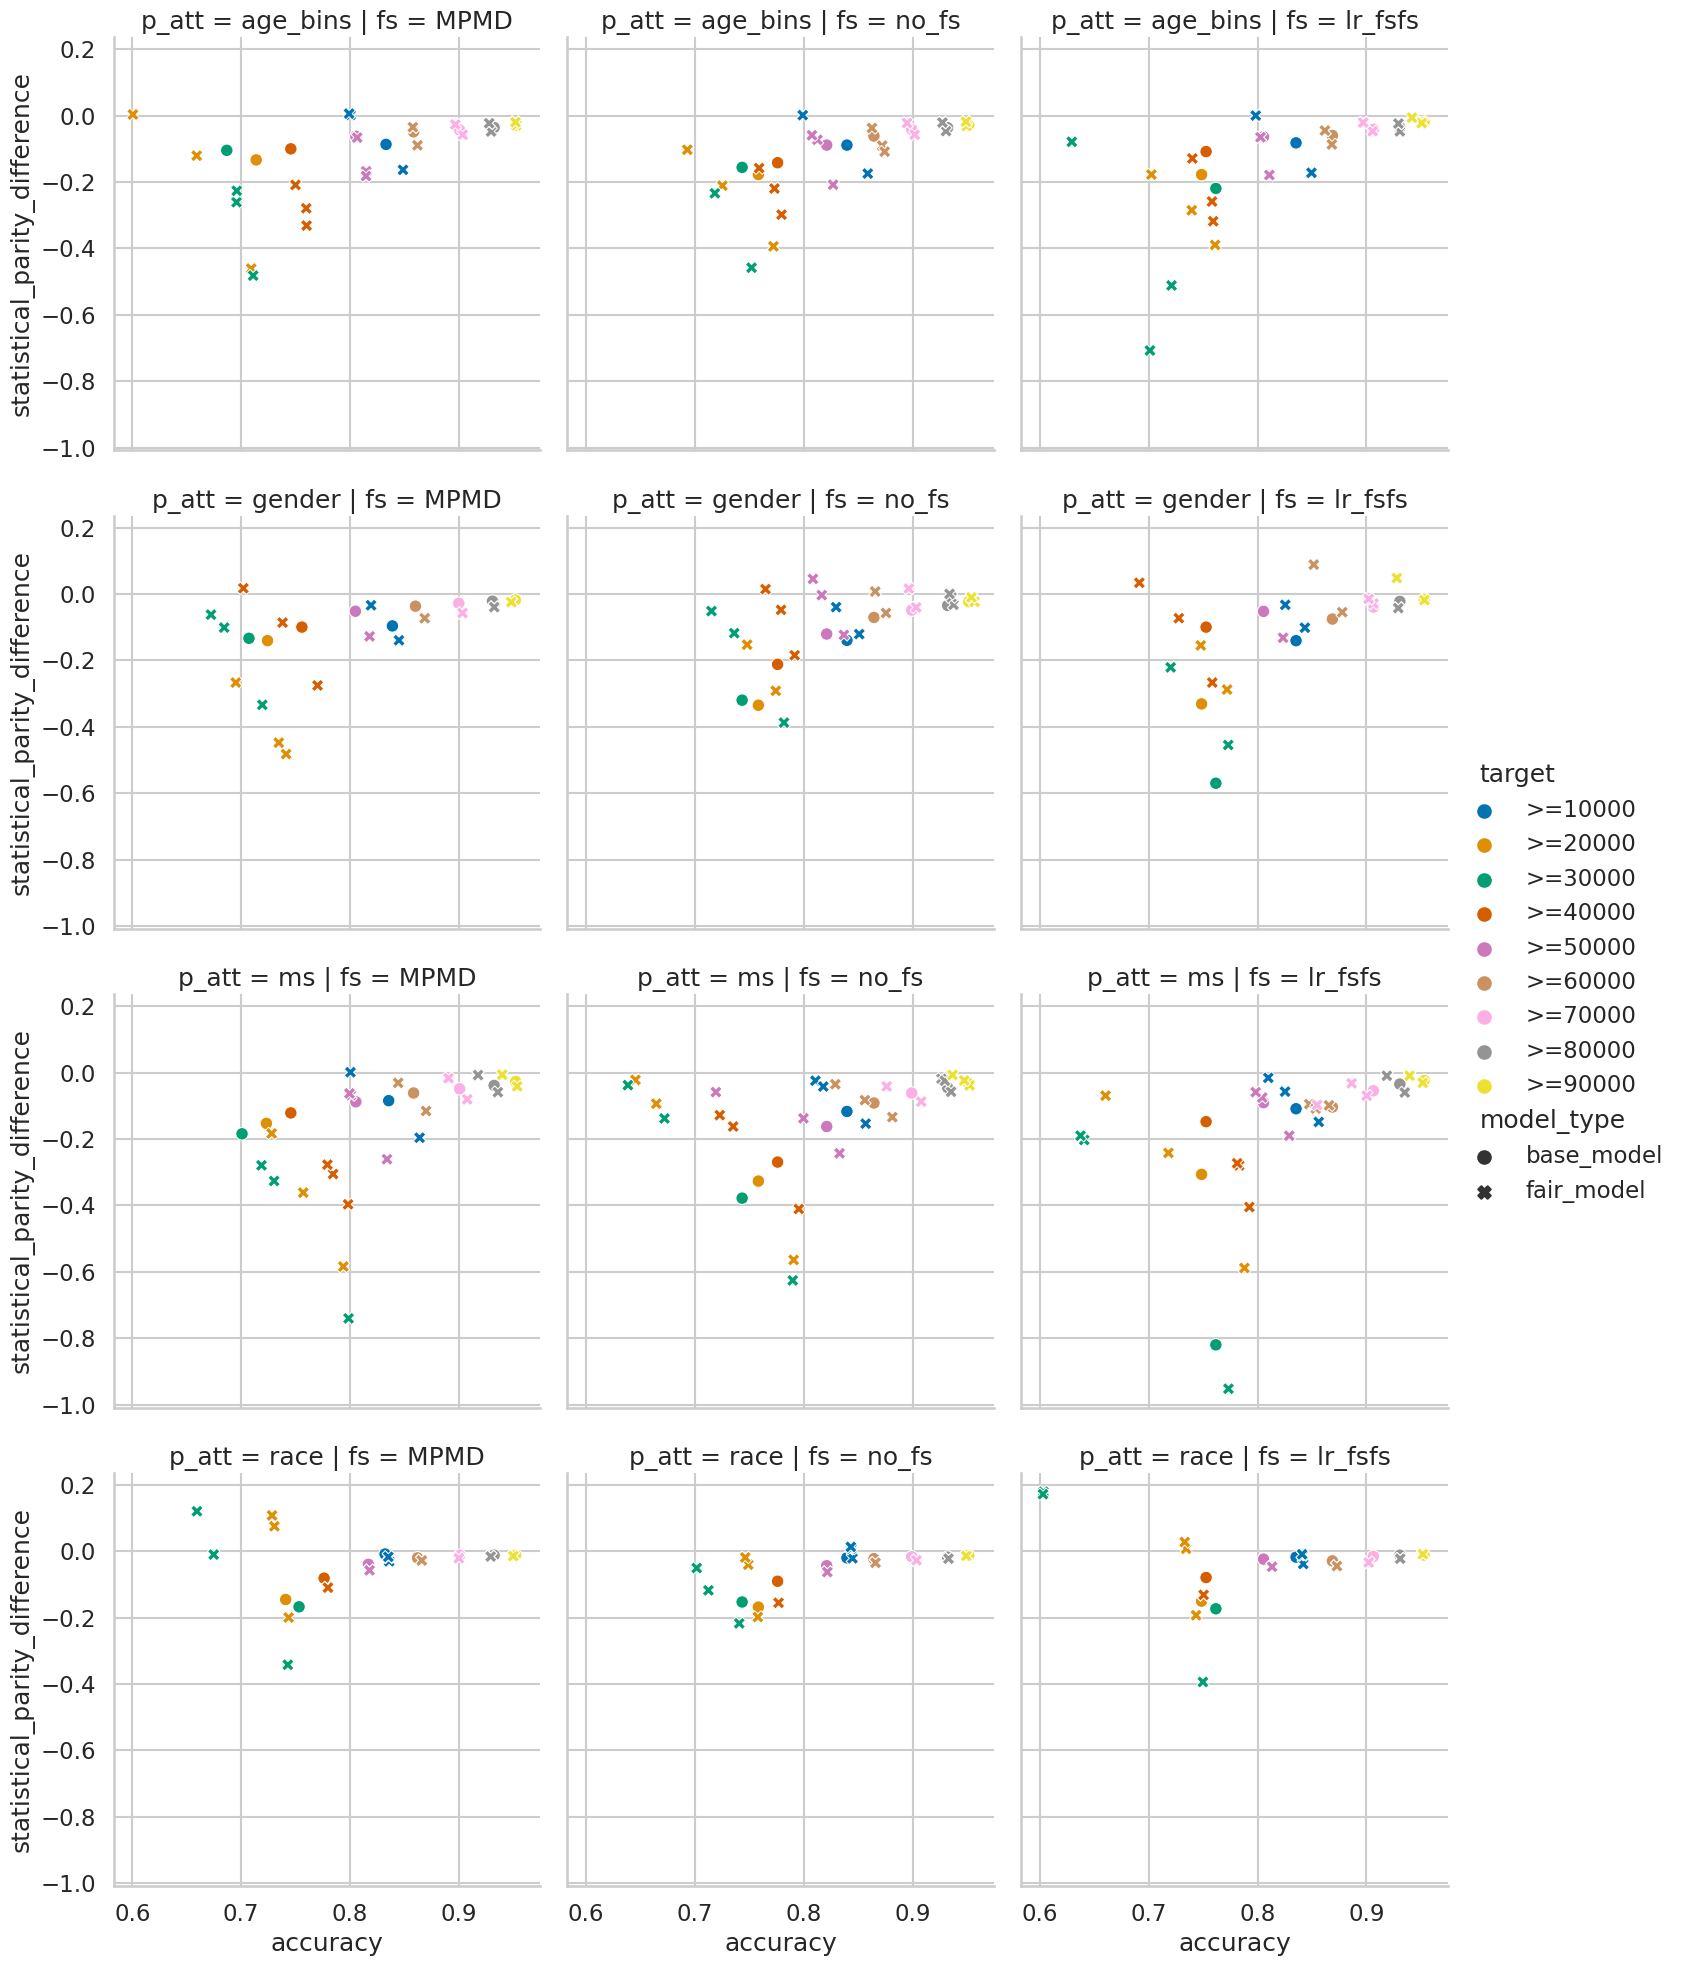

In [9]:


sp_adult_recon_ythres_mpmd = sns.relplot(data = data, x = 'accuracy', y ='statistical_parity_difference', hue='target', col = 'fs', 
            row = 'p_att', style = 'model_type', col_order = ['MPMD', 'no_fs','lr_fsfs'])

plt.savefig('sp_adult_recon_ythres_mpmd.png')


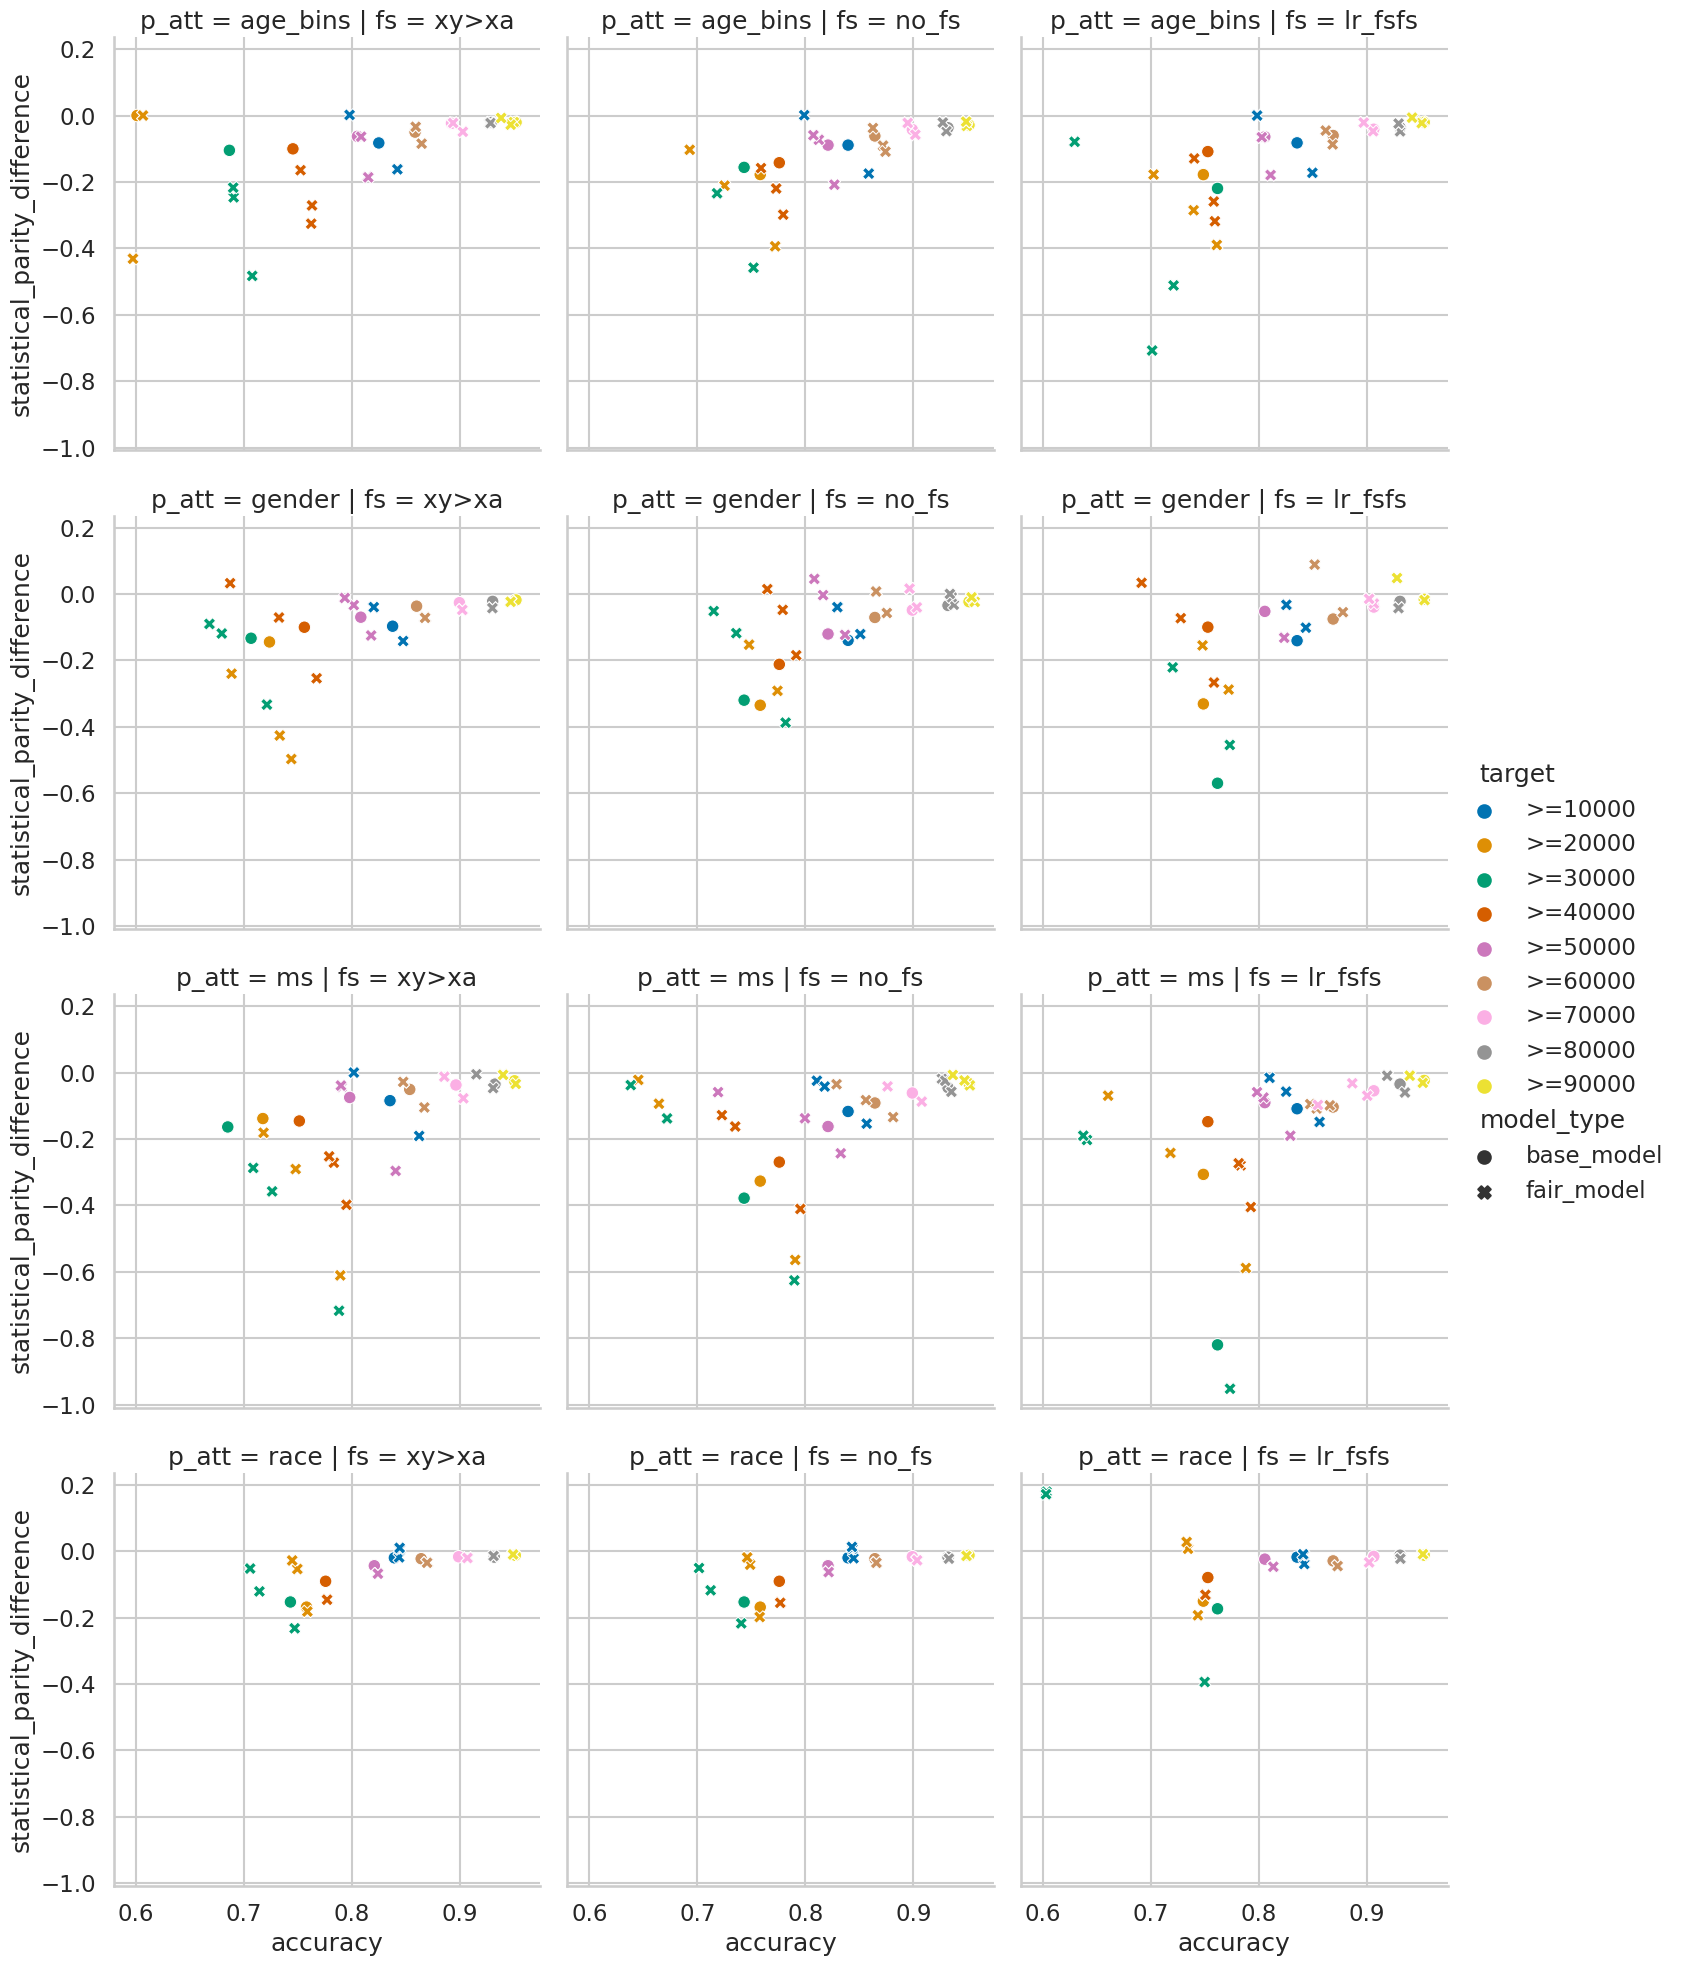

In [10]:
sp_adult_recon_ythres_mpmd = sns.relplot(data = data, x = 'accuracy', y ='statistical_parity_difference', hue='target', col = 'fs', 
            row = 'p_att', style = 'model_type', col_order = ['xy>xa', 'no_fs','lr_fsfs'])

plt.savefig('sp_adult_recon_ythres_xyxa.png')

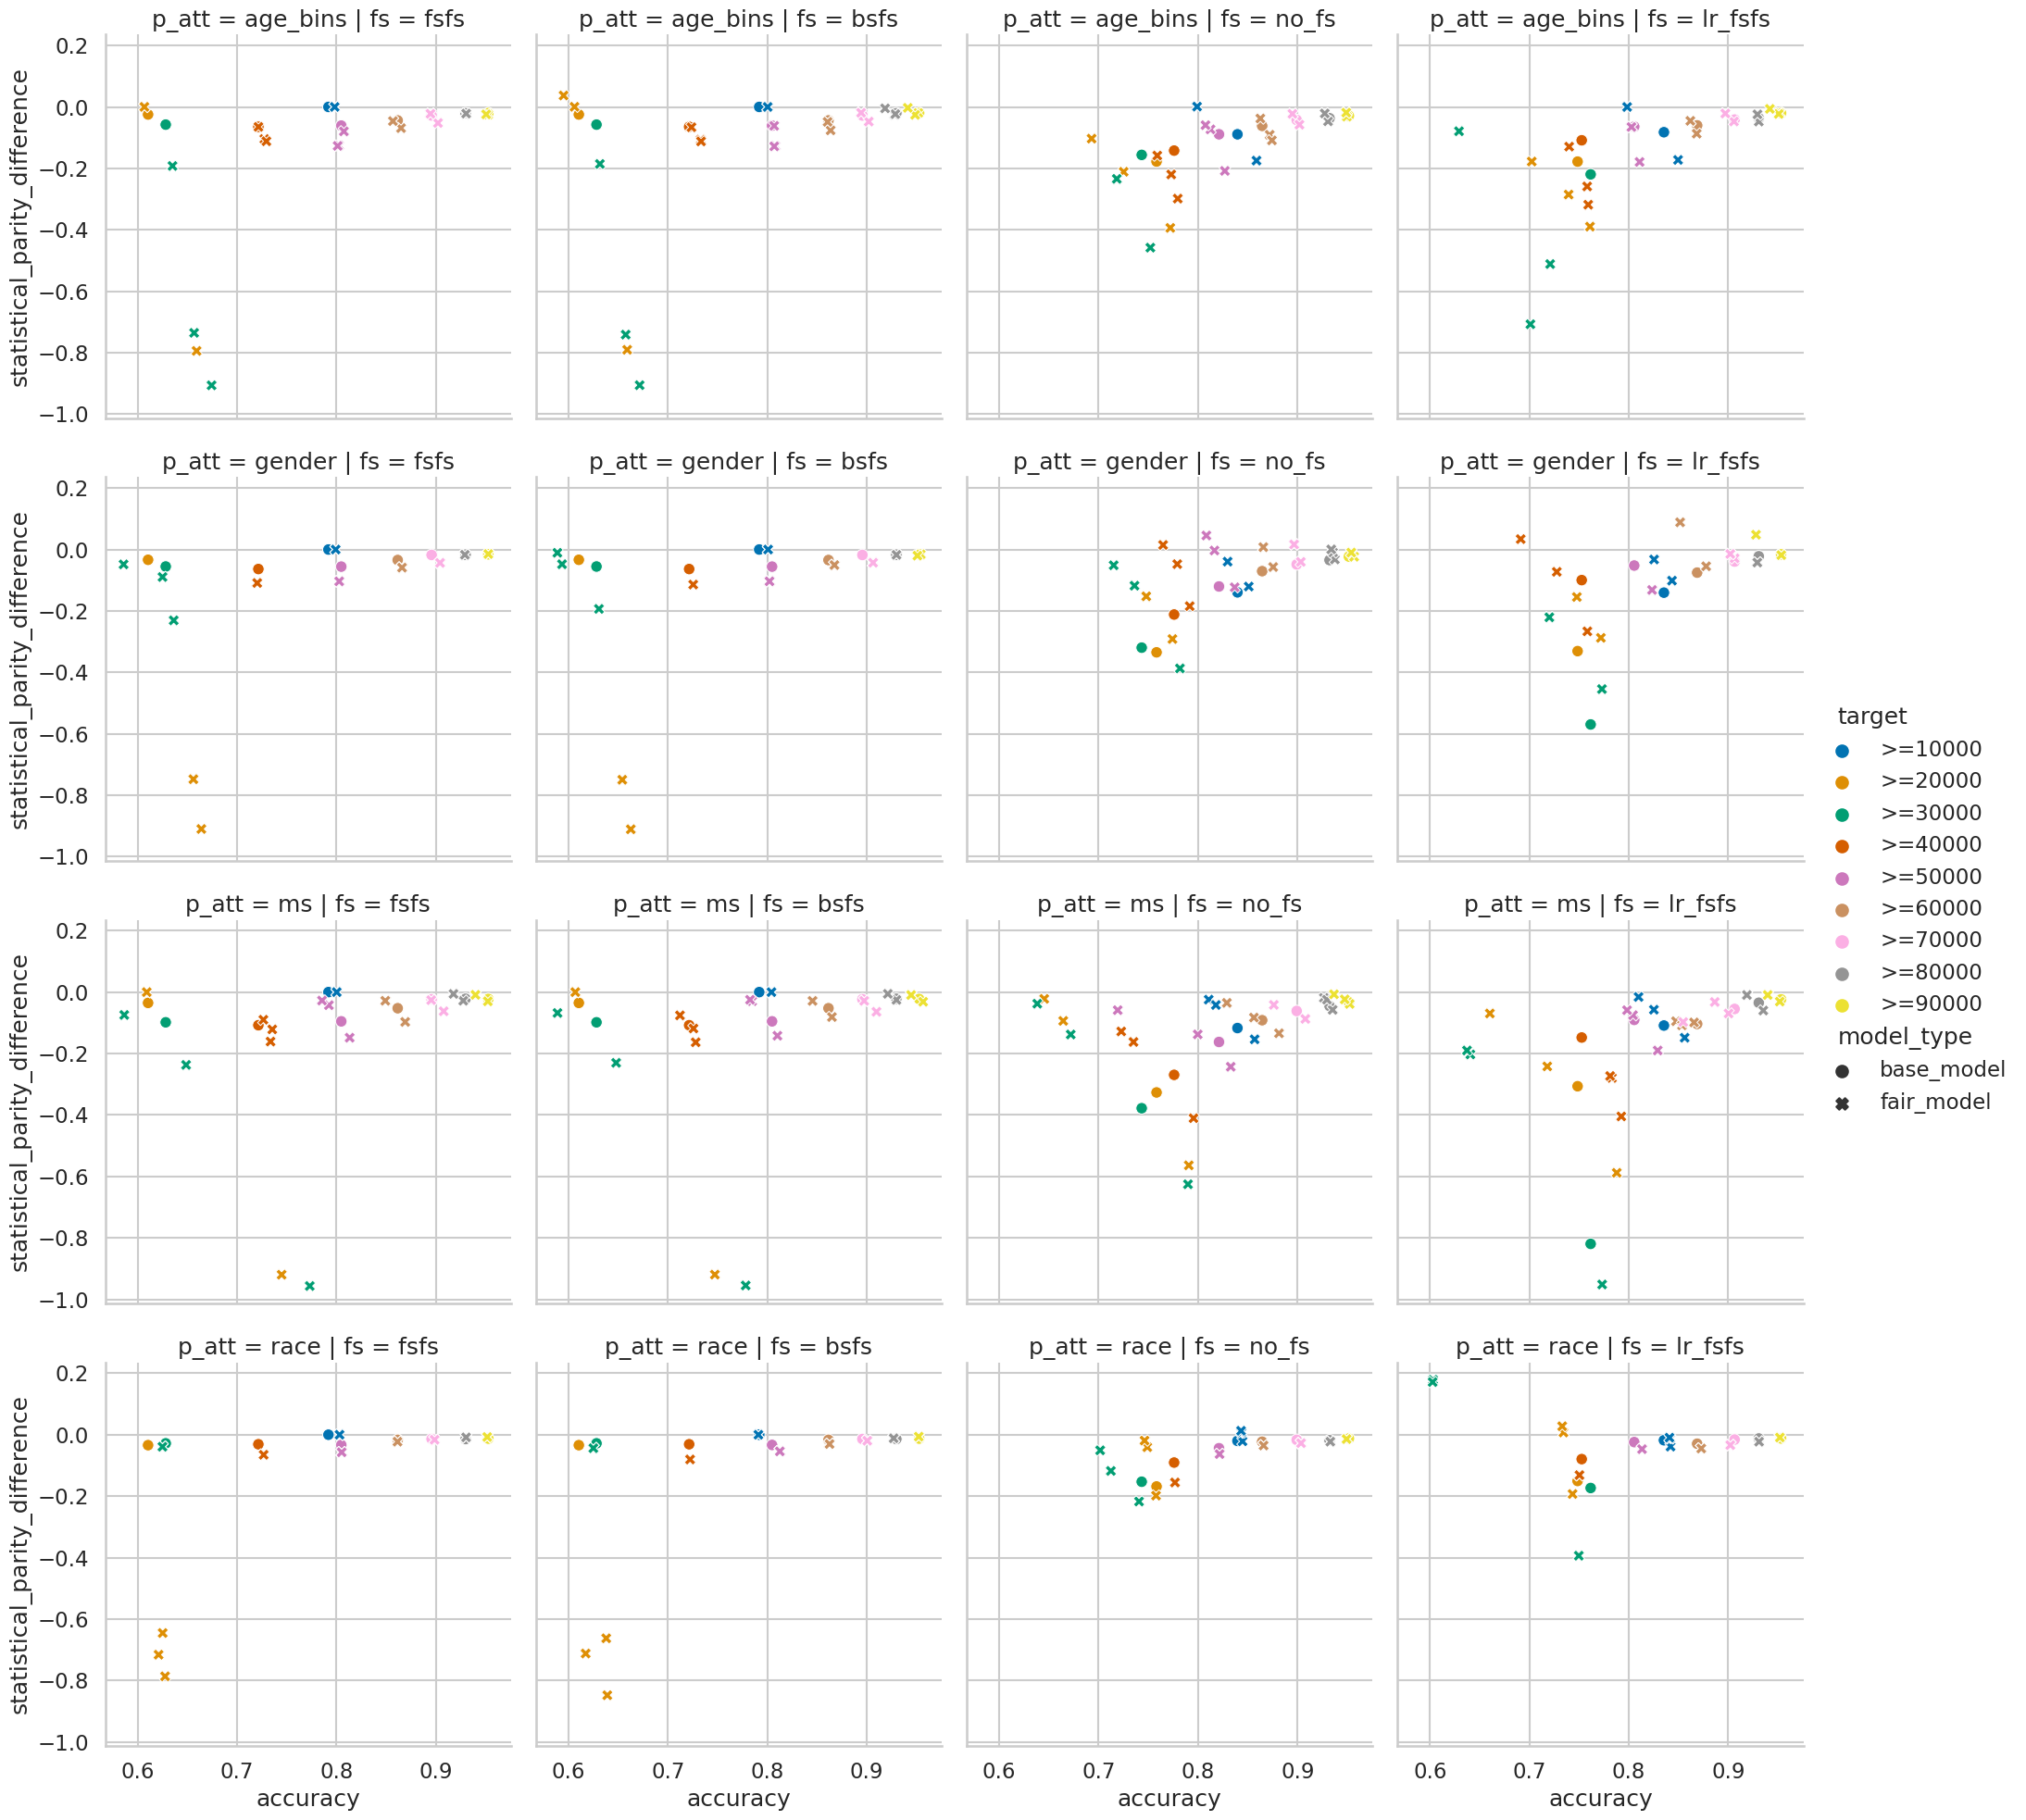

In [11]:
sp_adult_recon_ythres_mpmd = sns.relplot(data = data, x = 'accuracy', y ='statistical_parity_difference', hue='target', col = 'fs', 
            row = 'p_att', style = 'model_type', col_order = ['fsfs','bsfs', 'no_fs','lr_fsfs'])

plt.savefig('sp_adult_recon_ythres_bfsf.png')

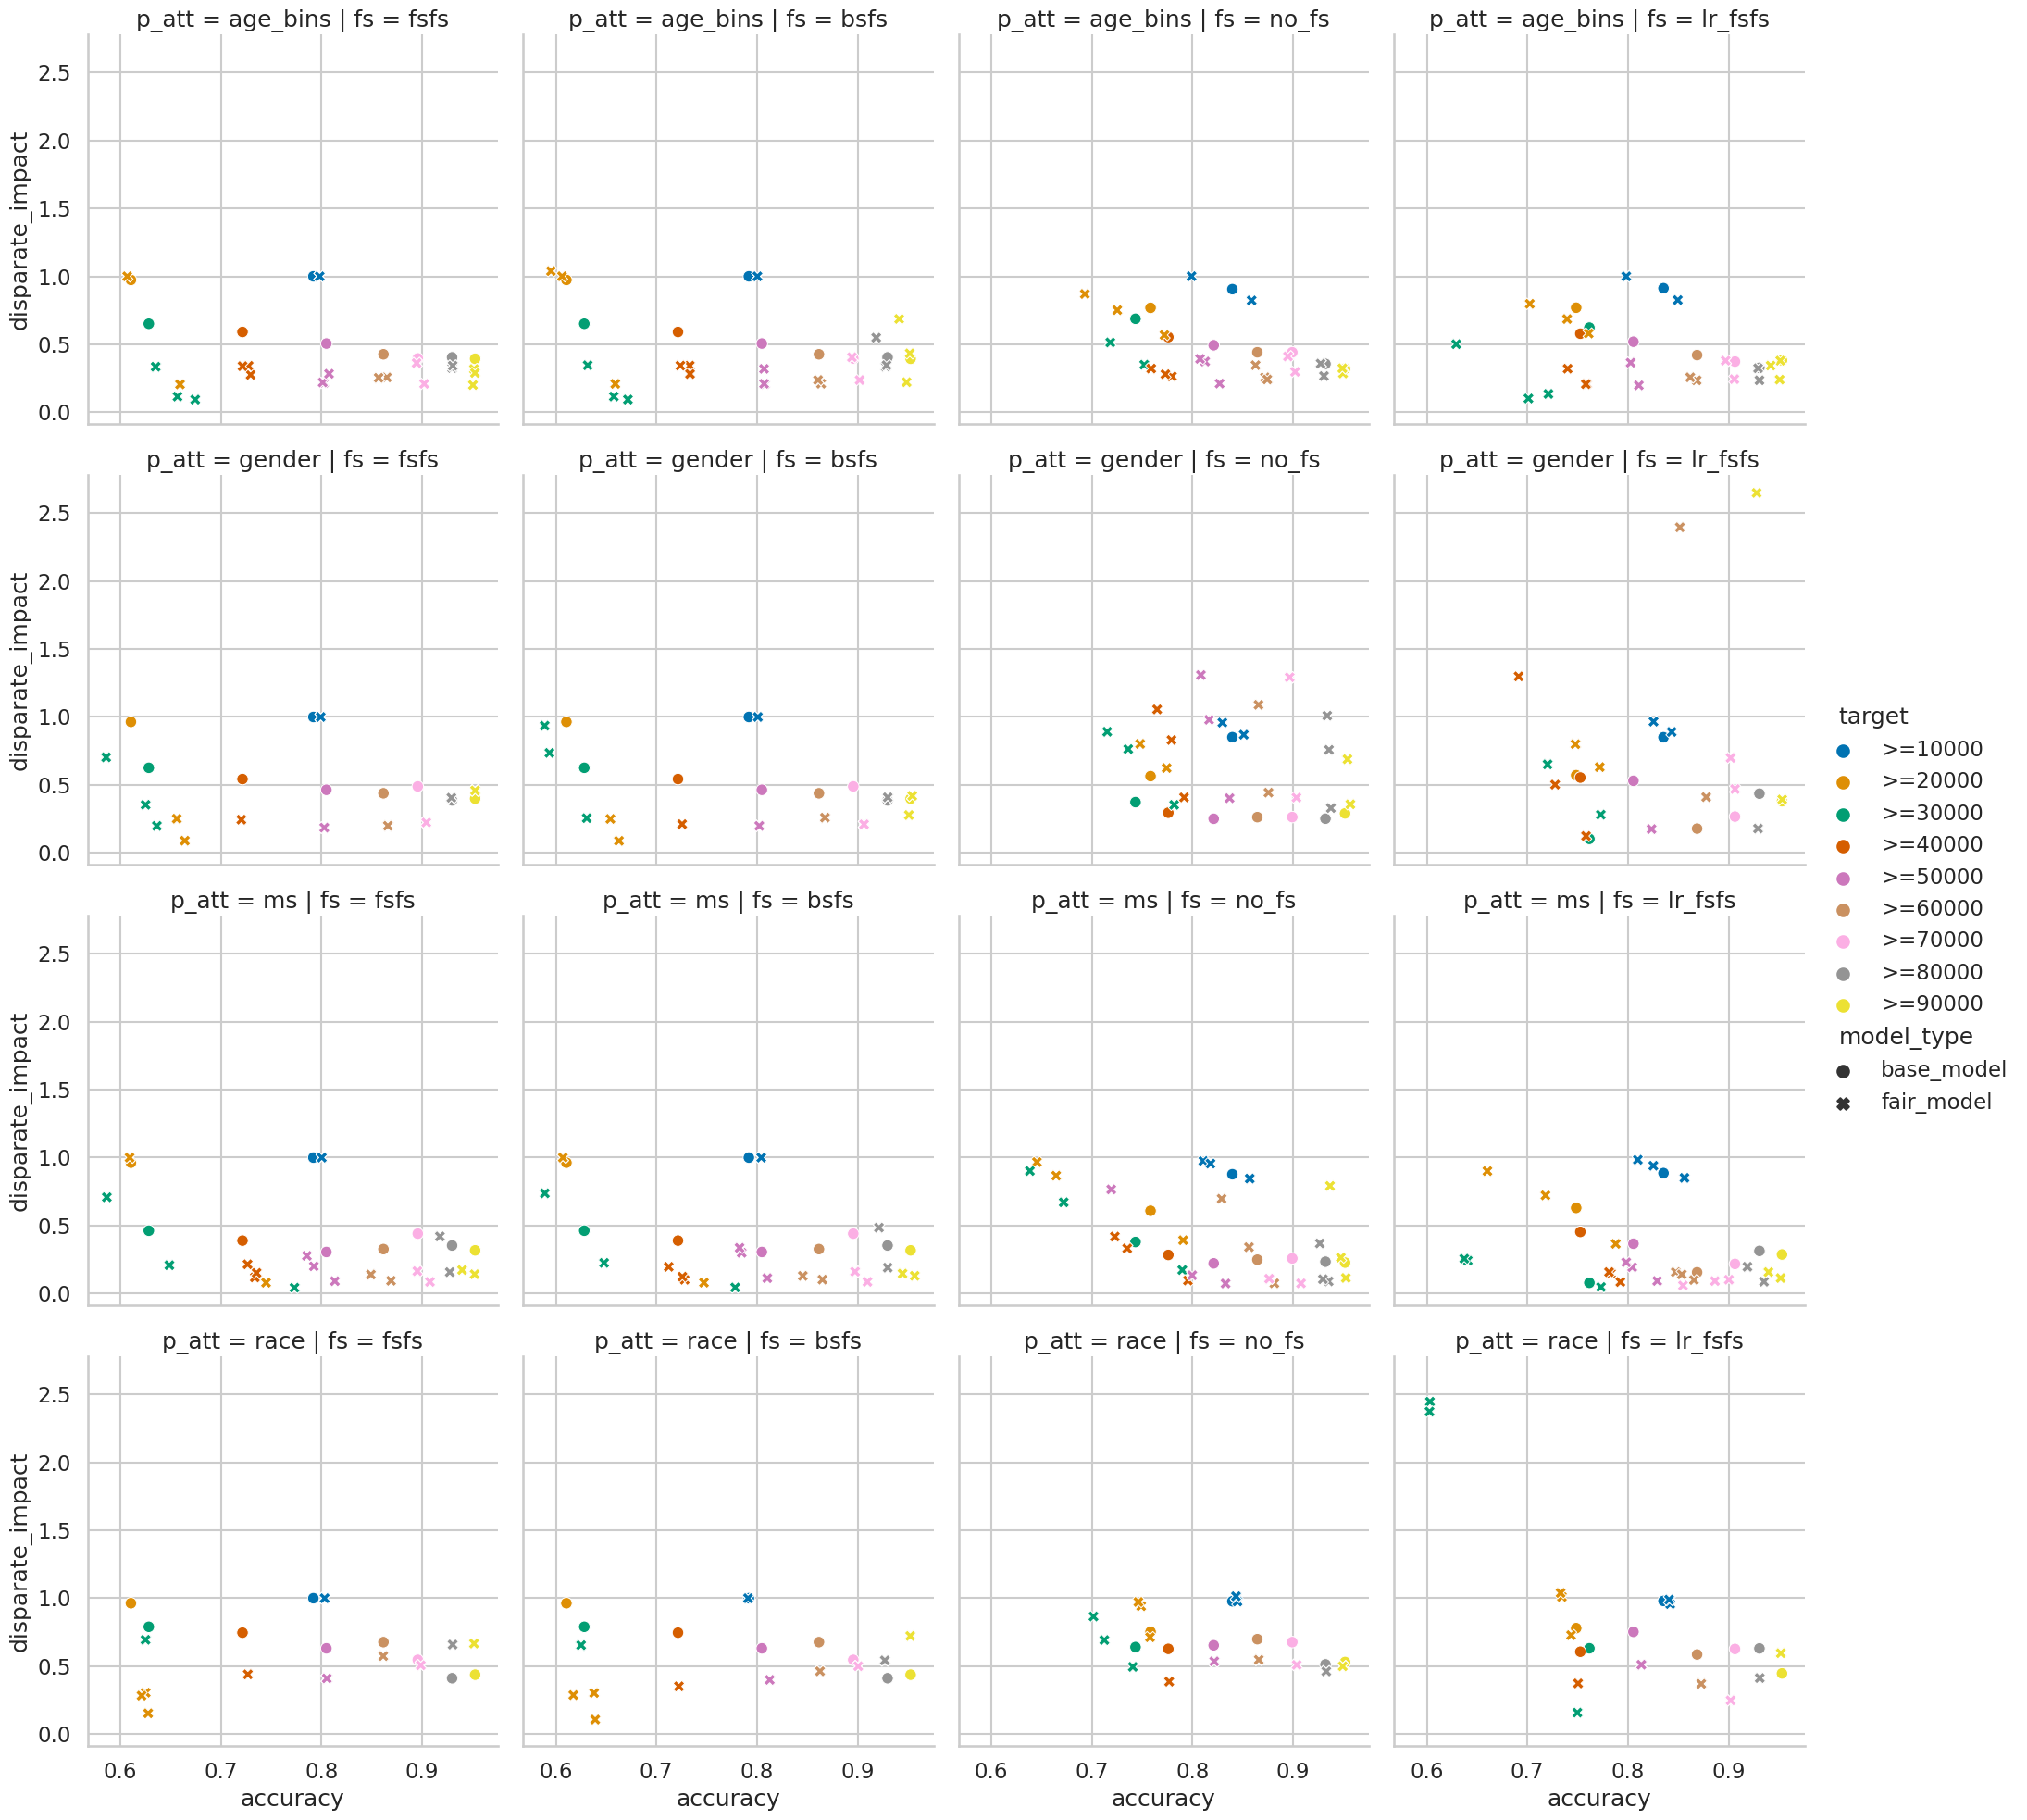

In [12]:


di_adult_recon_ythres_bfsf = sns.relplot(data = data, x = 'accuracy', y ='disparate_impact', hue='target', col = 'fs', 
            row = 'p_att', style = 'model_type',col_order = ['fsfs','bsfs', 'no_fs','lr_fsfs'])

plt.savefig('di_adult_recon_ythres_bfsf.png')

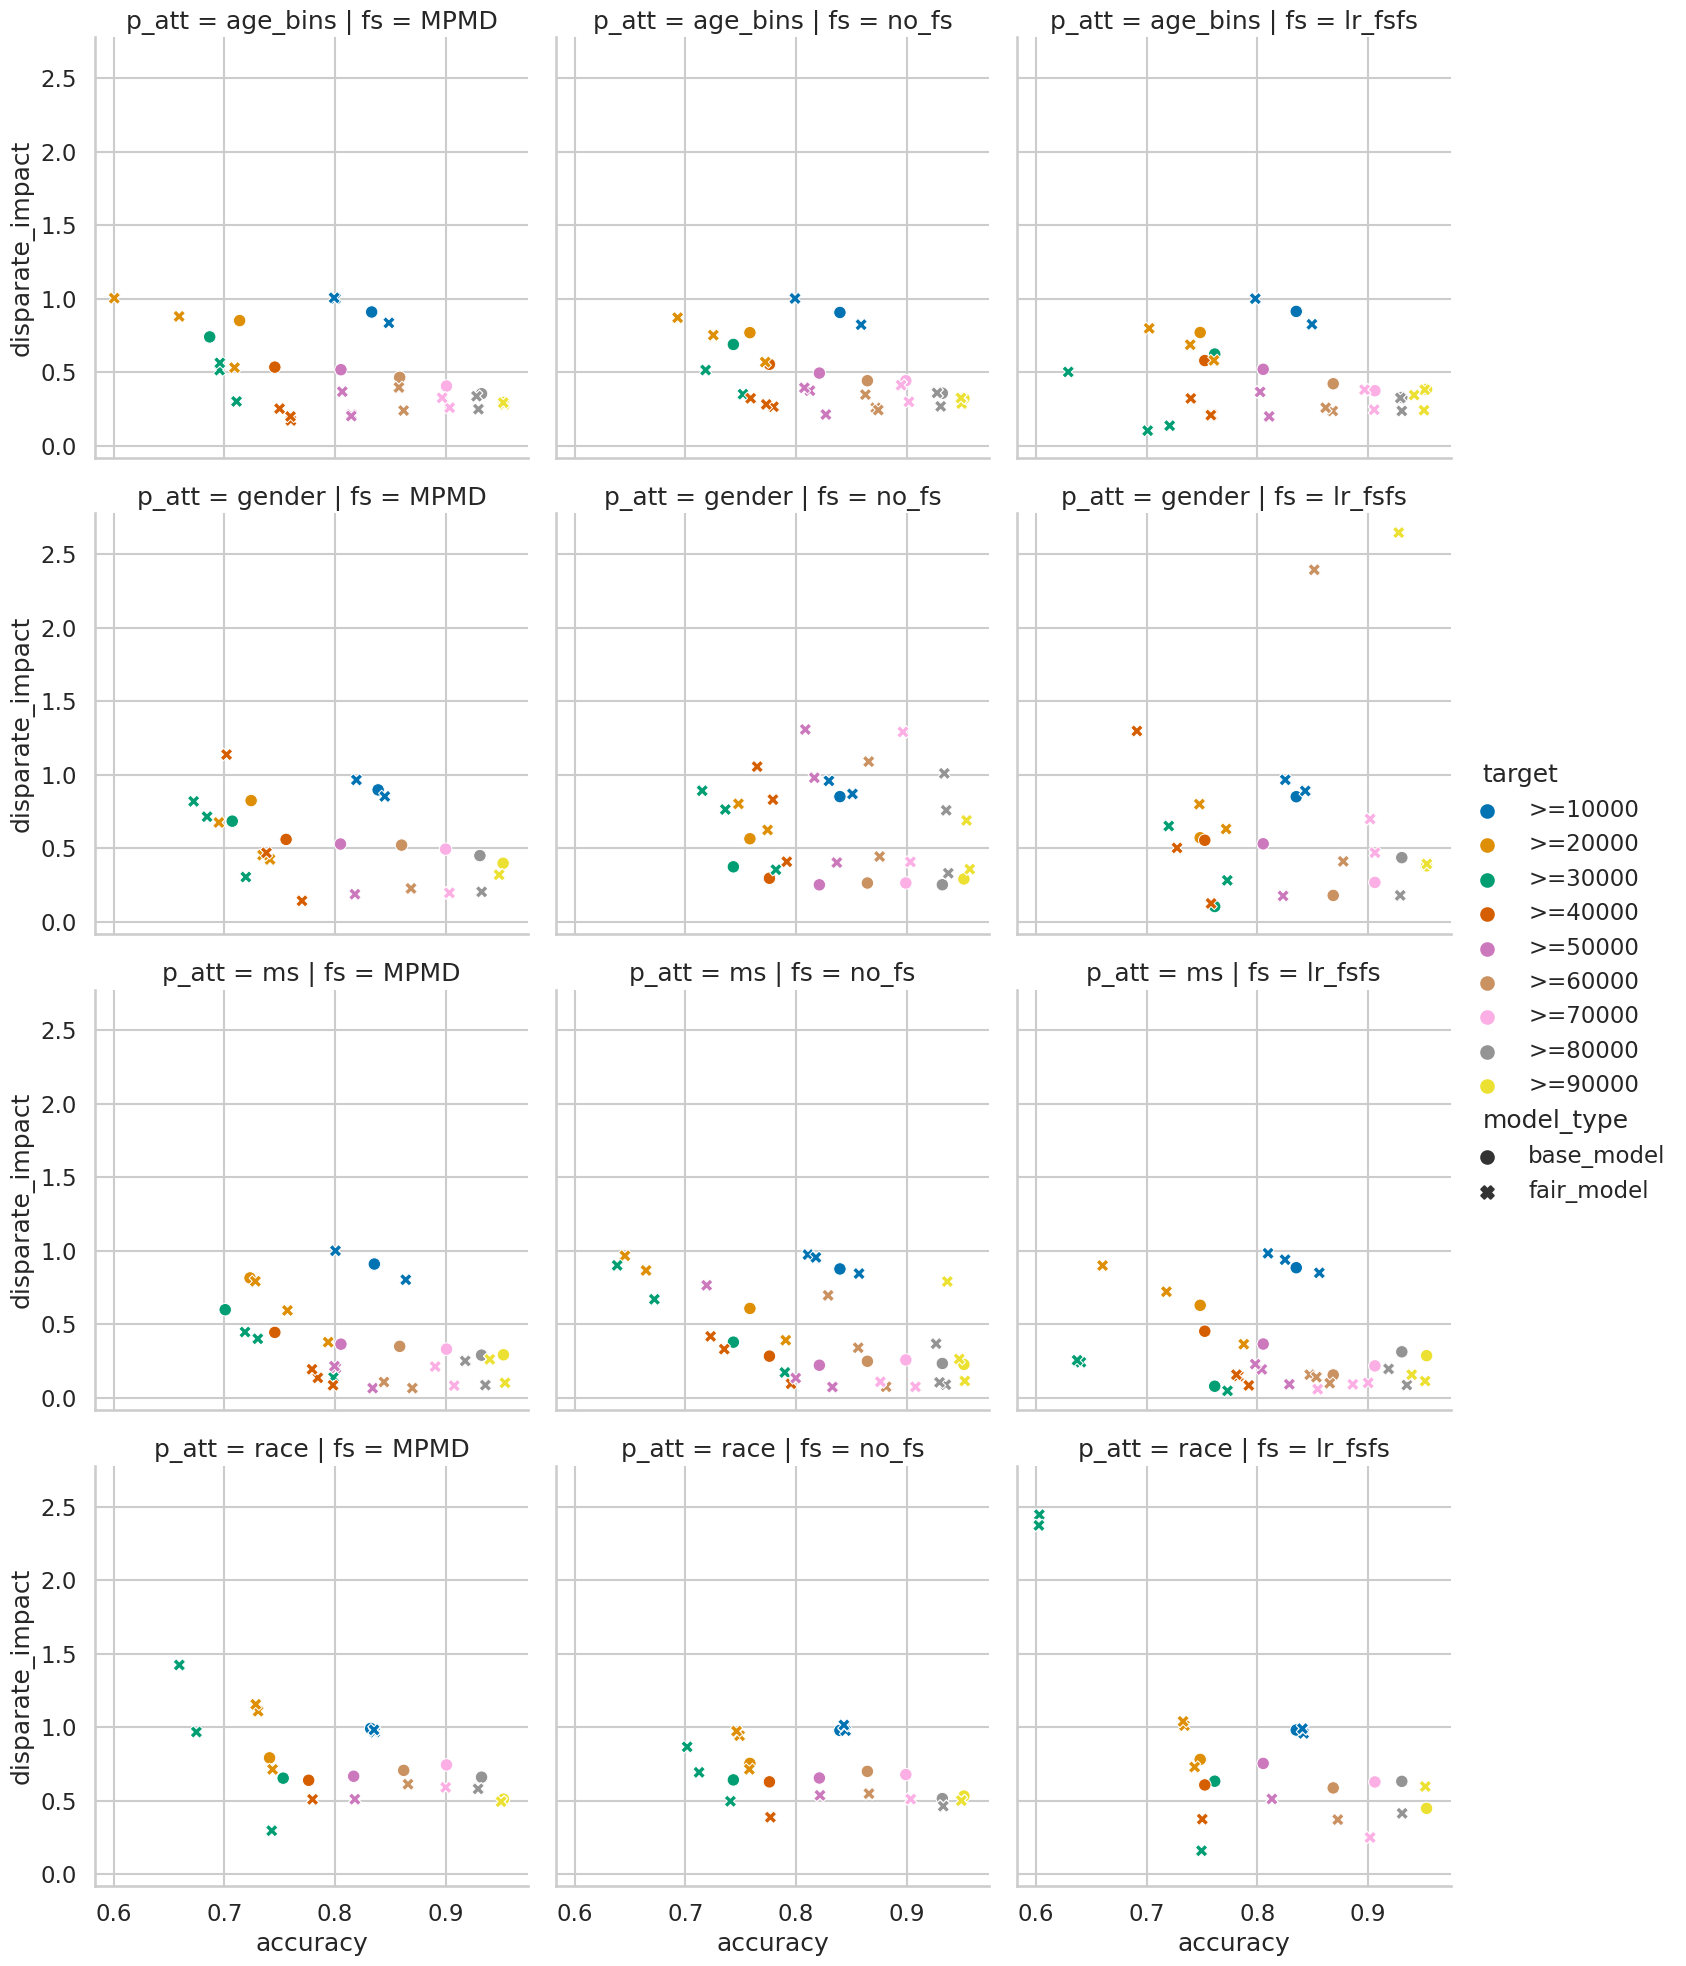

In [13]:
di_adult_recon_ythres_mpmd = sns.relplot(data = data, x = 'accuracy', y ='disparate_impact', hue='target', col = 'fs', 
            row = 'p_att', style = 'model_type',col_order = ['MPMD', 'no_fs','lr_fsfs'])

plt.savefig('di_adult_recon_ythres_mpmd.png')

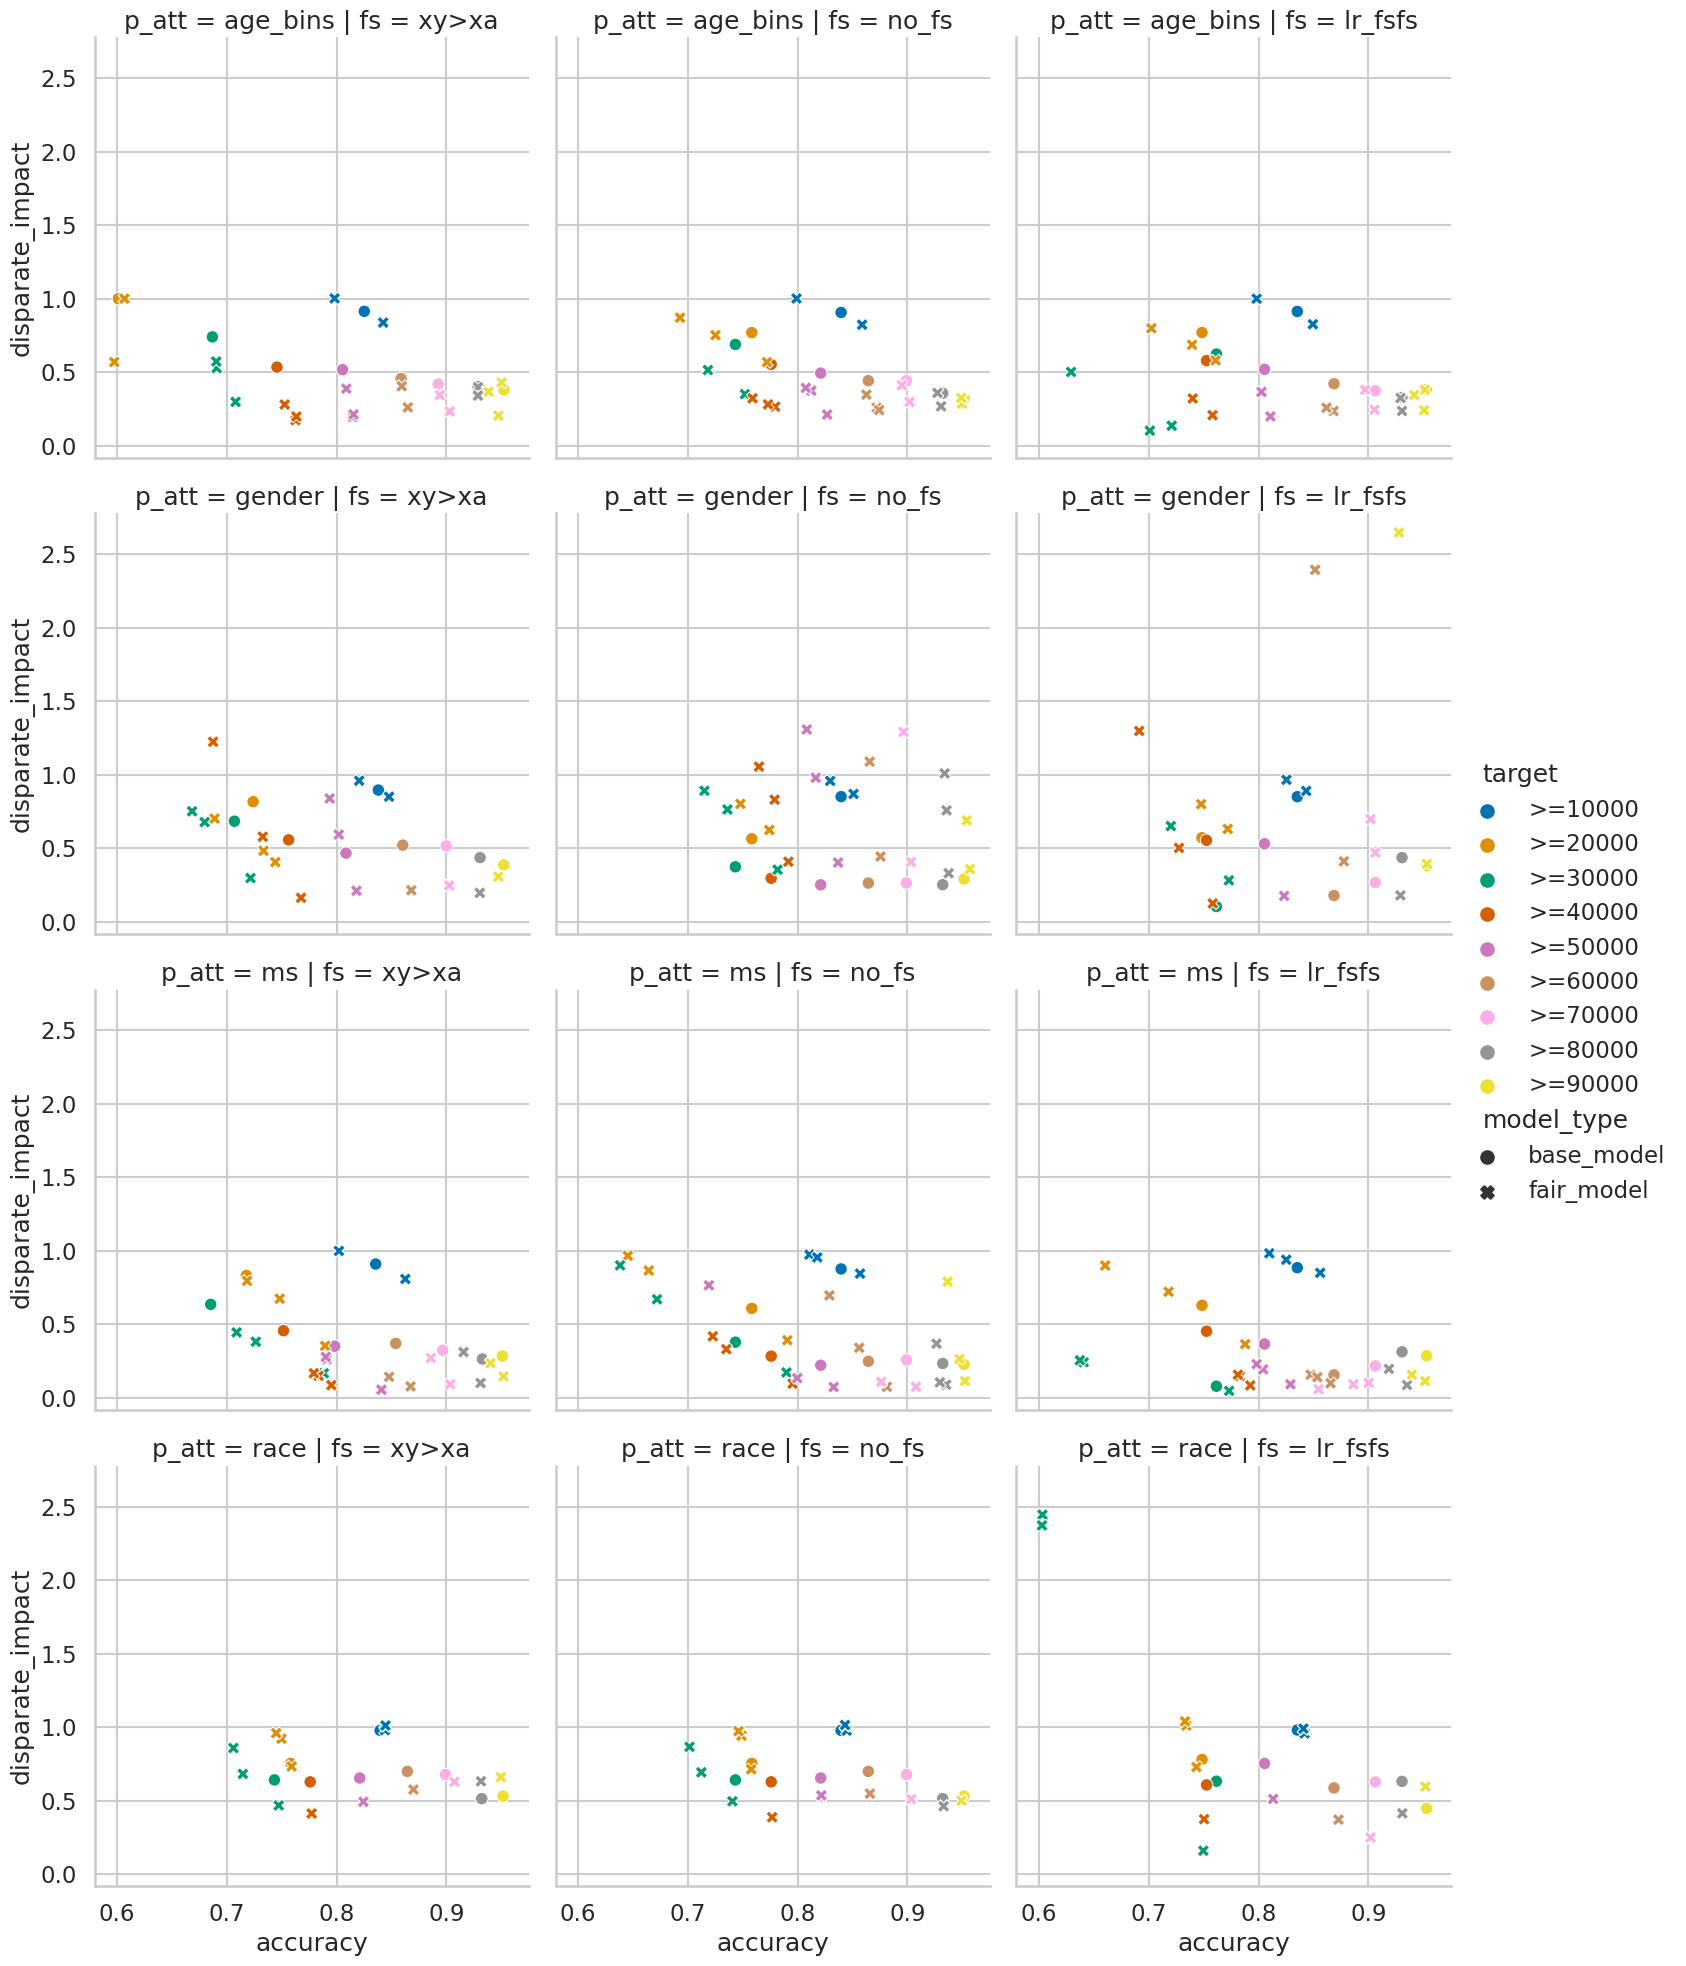

In [14]:
di_adult_recon_ythres_xyxa = sns.relplot(data = data, x = 'accuracy', y ='disparate_impact', hue='target', col = 'fs', 
            row = 'p_att', style = 'model_type',col_order = ['xy>xa', 'no_fs','lr_fsfs'])

plt.savefig('di_adult_recon_ythres_xyxa.png')

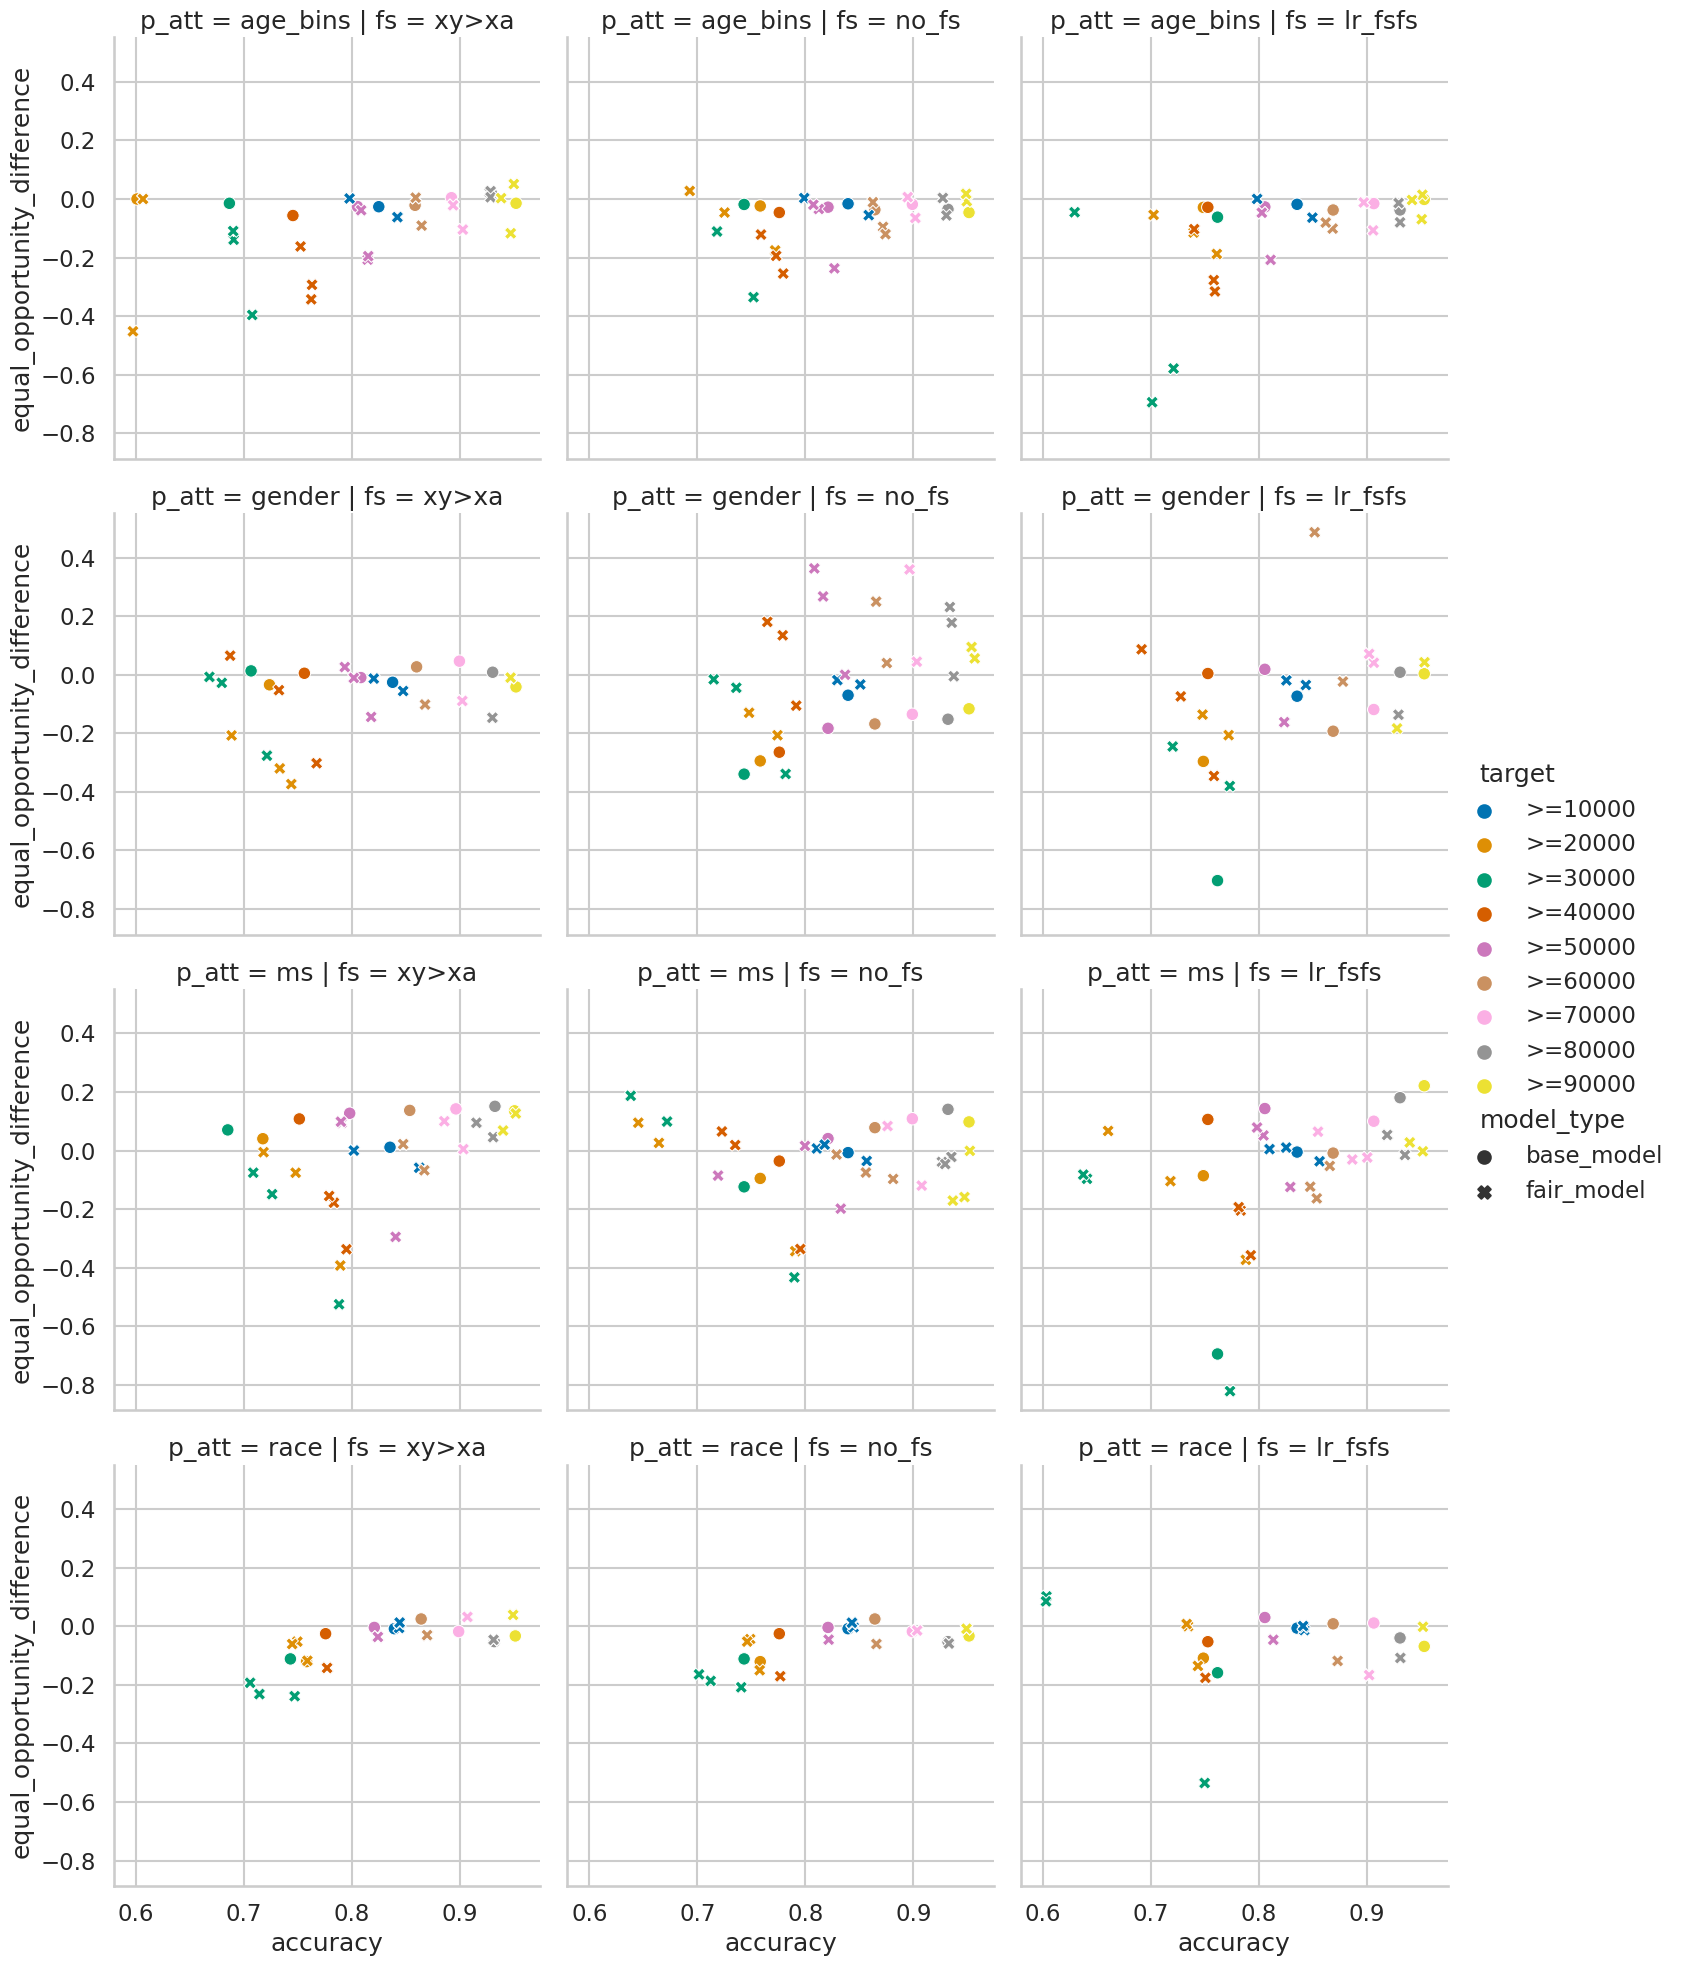

In [15]:


eo_adult_recon_ythres_xyxa = sns.relplot(data = data, x = 'accuracy', y ='equal_opportunity_difference', hue='target', col = 'fs', 
            row = 'p_att', style = 'model_type',col_order = ['xy>xa', 'no_fs','lr_fsfs'])

plt.savefig('eo_adult_recon_ythres_xyxa.png')

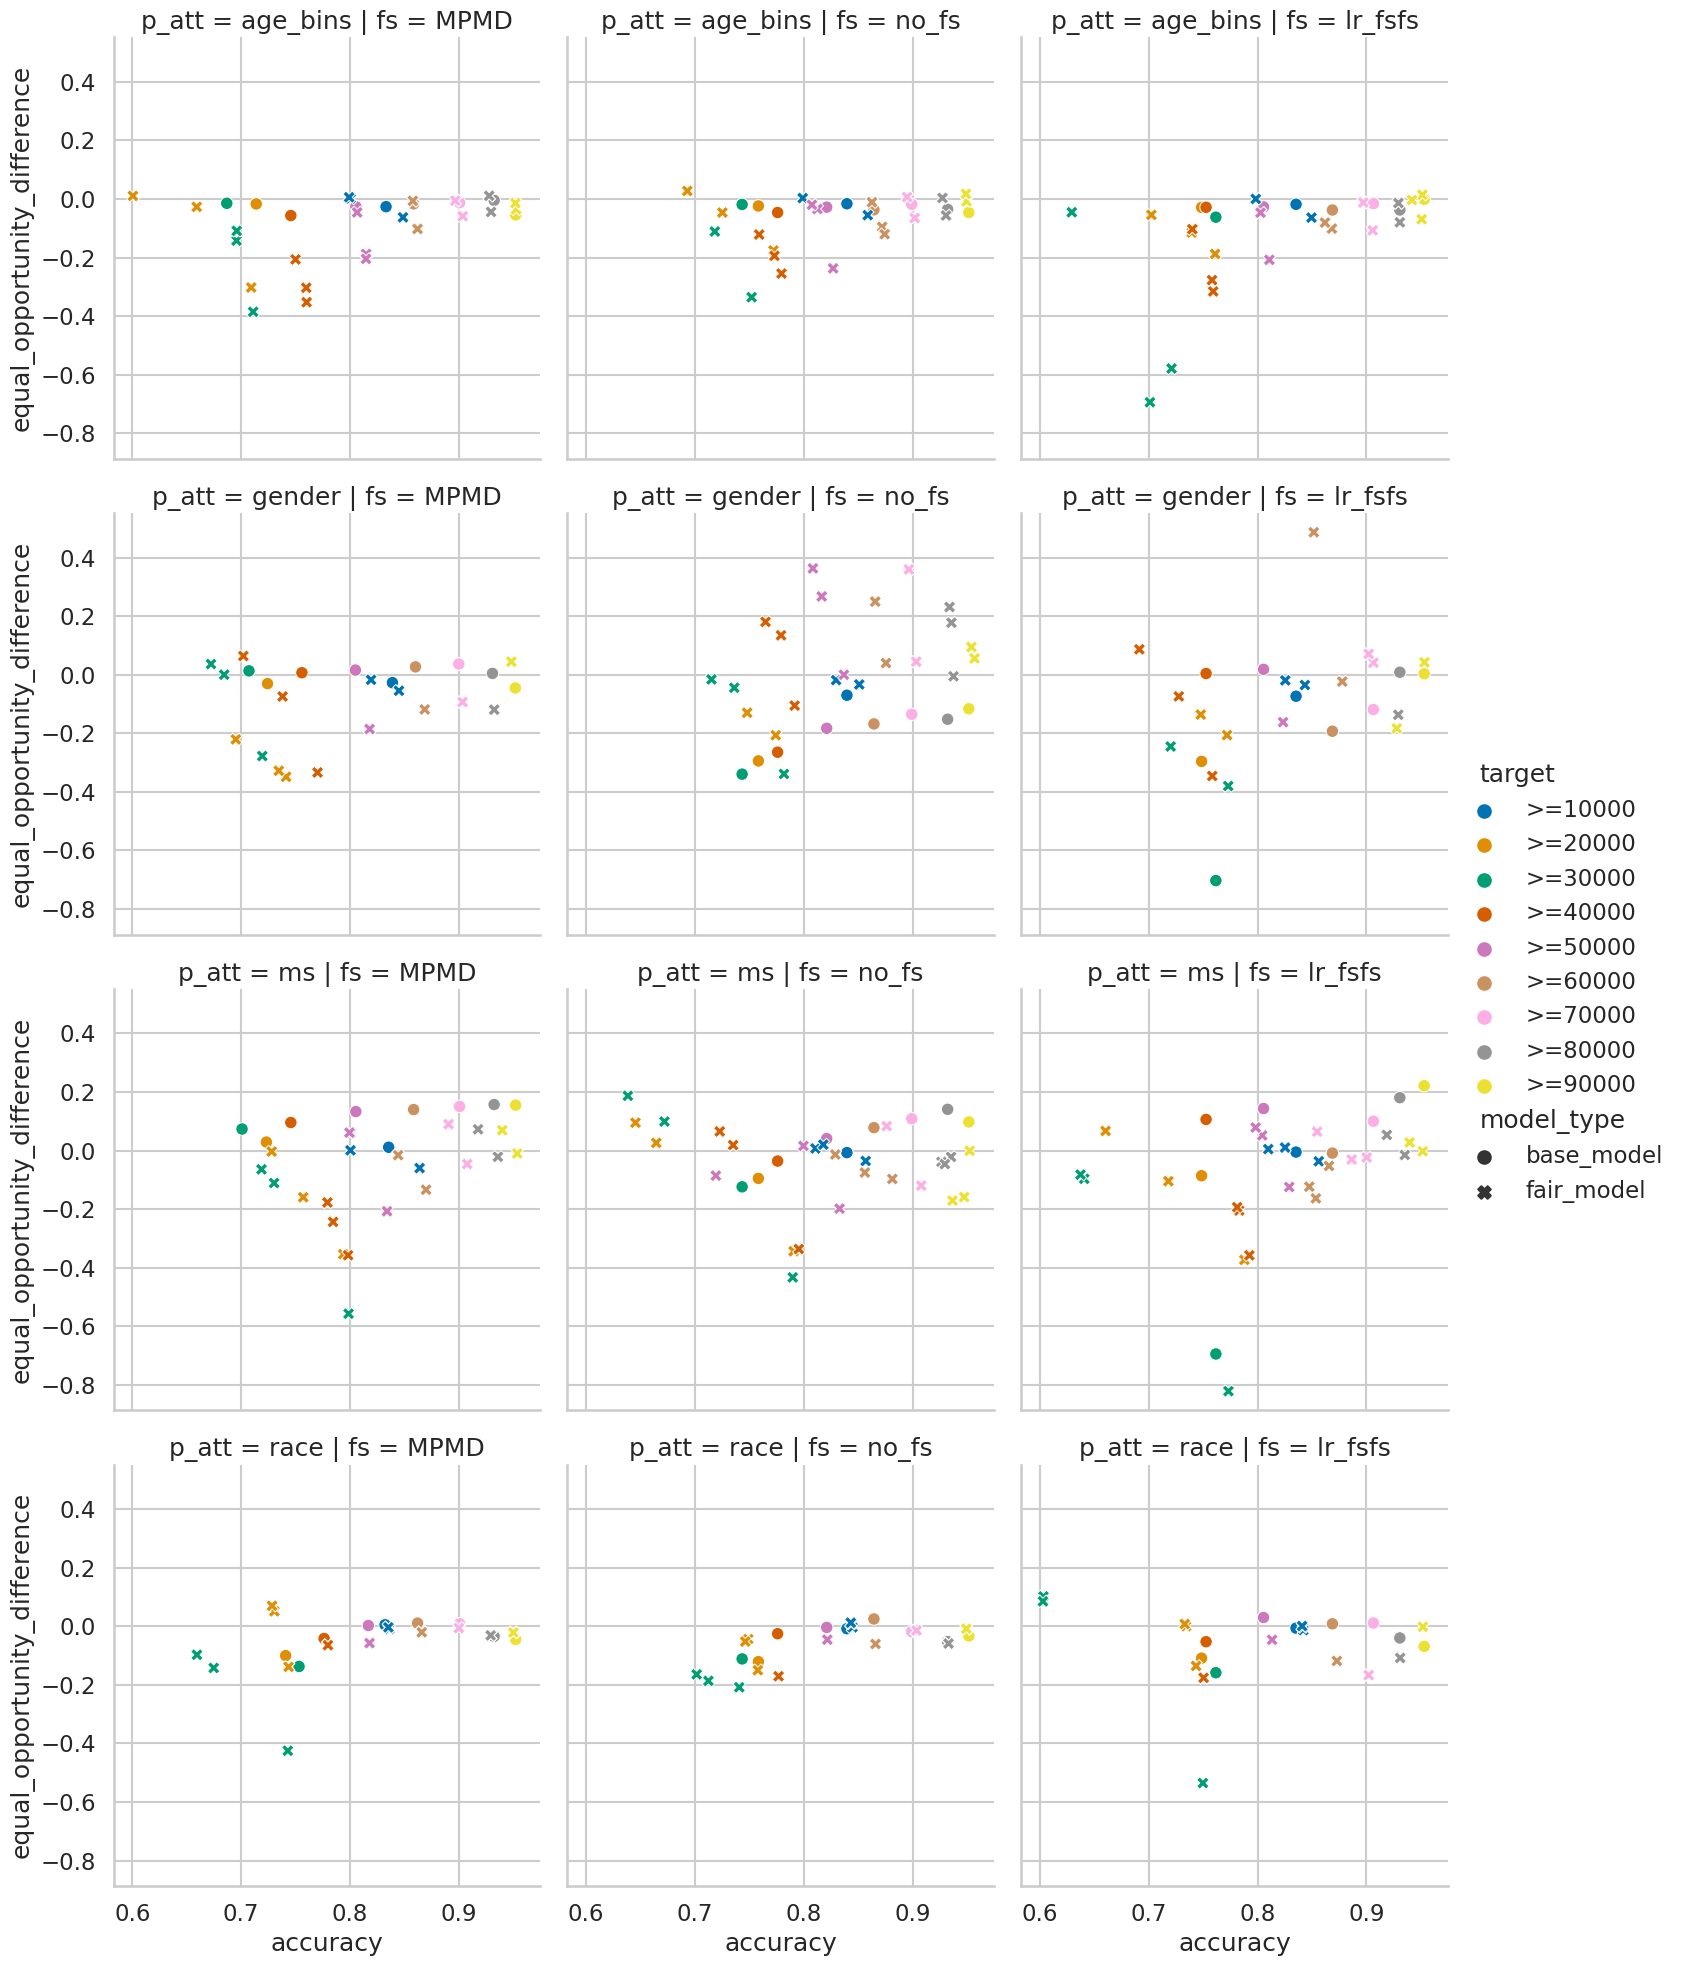

In [16]:
eo_adult_recon_ythres_mpmd = sns.relplot(data = data, x = 'accuracy', y ='equal_opportunity_difference', hue='target', col = 'fs', 
            row = 'p_att', style = 'model_type',col_order = ['MPMD', 'no_fs','lr_fsfs'])

plt.savefig('eo_adult_recon_ythres_mpmd.png')

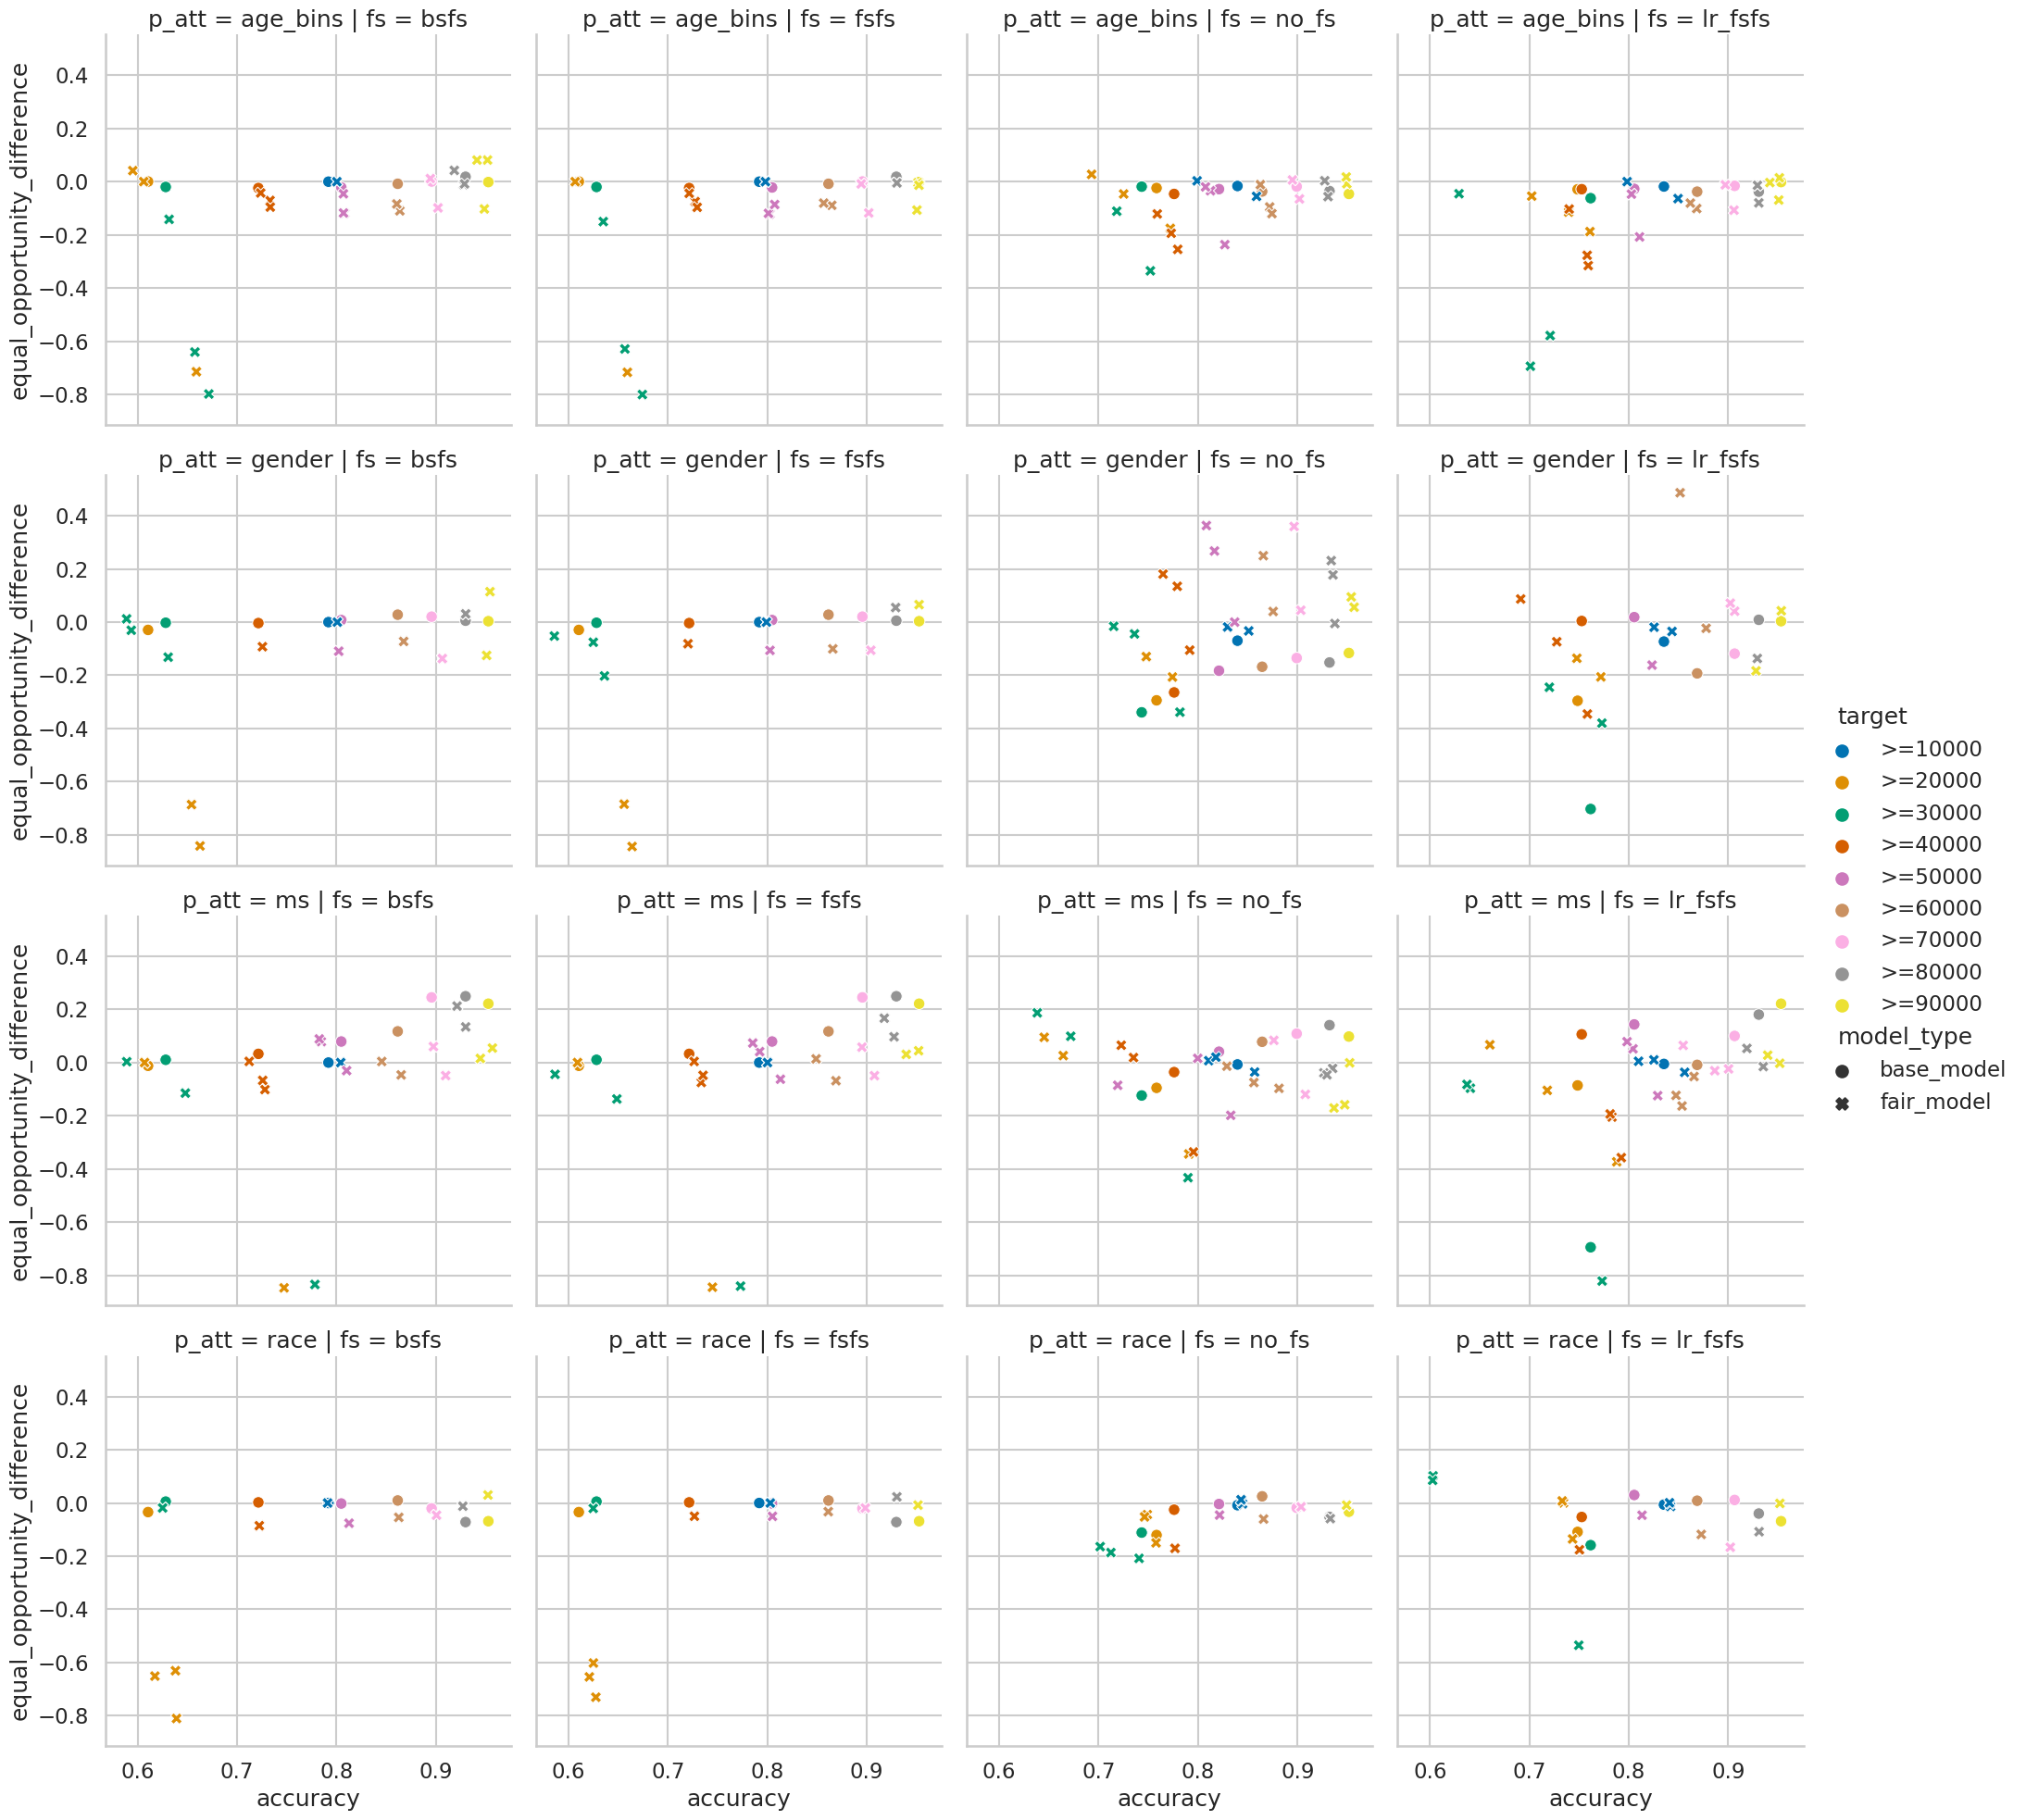

In [17]:
eo_adult_recon_ythres_bfsf = sns.relplot(data = data, x = 'accuracy', y ='equal_opportunity_difference', hue='target', col = 'fs', 
            row = 'p_att', style = 'model_type',col_order = ['bsfs','fsfs', 'no_fs','lr_fsfs'])

plt.savefig('eo_adult_recon_ythres_bfsf.png')